## Welcome to my WHR 2024 exploration.

Here we will pick apart and get a deep dive on the report, having a clear question(s) on what to look for and get answered, finding correlations, driving trends, relationships, distributions and so on.

There will be a lot of tinkering about, but that is ok!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
orig_df = pd.read_excel("/home/olav/dev/python/practical-statistics-for-data-scientists/data/DataForTable2.1.xls")
orig_df = orig_df.rename(columns={"Life Ladder": "ll"})

In [3]:
# To work with something easier to write!
df = orig_df.copy(deep=True)

Let's take a look at the data

In [4]:
orig_df.shape

(2363, 11)

In [5]:
orig_df.head()

,Country name,year,ll,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919


In [7]:
len(df["Country name"].unique())

165

Thats a lot of countries! But not like the ~192 the UN agrees upon.

### The WHR asks the question
Please imagine a ladder with steps numbered from zero at the bottom to 10 at the top.
The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you.
On which step of the ladder would you say you personally feel you stand at this time? (ladder-present)


On which step do you think you will stand about five years from now? (ladder-future)


Answers to the question end up in the *Life Ladder* (LL) column.
We can start looking at the data, plot some country's statistics vs each other.

### The other columns
GDP per capita
* Social support - is the national
average of the binary responses (either 0 or 1) to the GWP question “If you
were in trouble, do you have relatives or friends you can count on to help you
whenever you need them, or not?”
* Healthy life exp at birth - Healthy Life Expectancy (HLE). Healthy life expectancies at birth are based
on the data extracted from the World Health Organization’s (WHO) Global
Health Observatory data repository (Last updated: 2020-12-04). The data at
the source are available for the years 2000, 2010, 2015 and 2019. To match this
report’s sample period, interpolation and extrapolation are used.
* Freedom to make life choices - the national average of responses to the GWP
question “Are you satisfied or dissatisfied with your freedom to choose what
you do with your life?”
* Generosity - the residual of regressing national average of response to the GWP
question “Have you donated money to a charity in the past month?” on GDP
per capita.
* Perceptions of corruption - The measure is the national average of the survey responses to two questions in the GWP: “Is corruption widespread throughout
the government or not” and “Is corruption widespread within businesses or
not?” The overall perception is just the average of the two 0-or-1 responses. In
case the perception of government corruption is missing, we use the perception
of business corruption as the overall perception. The corruption perception at
the national level is just the average response of the overall perception at the
individual level.
* Positive affect -  defined as the average of three positive affect measures in GWP:
laugh, enjoyment and doing interesting things in the Gallup World Poll. These
measures are the responses to the following three questions, respectively: “Did
you smile or laugh a lot yesterday?”, and “Did you experience the following
feelings during A LOT OF THE DAY yesterday? How about Enjoyment?”,
“Did you learn or do something interesting yesterday?”
* Negative affect - defined as the average of three negative affect measures in
GWP. They are worry, sadness and anger, respectively the responses to “Did
you experience the following feelings during A LOT OF THE DAY yesterday?
How about Worry?”, “Did you experience the following feelings during A LOT
OF THE DAY yesterday? How about Sadness?”, and “Did you experience the
following feelings during A LOT OF THE DAY yesterday? How about Anger?”

(0.0, 8.06109938621521)

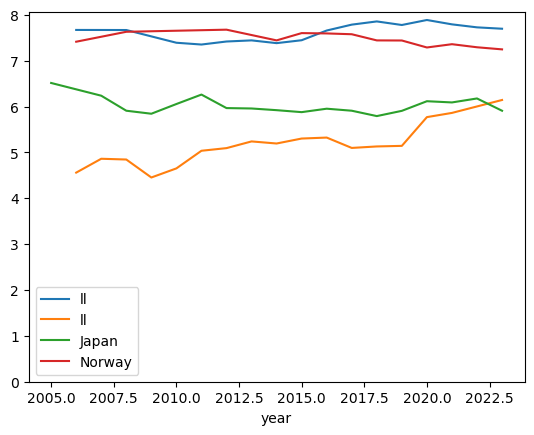

In [8]:
ax = plt.gca()
col_to_plot = "ll"
orig_df[orig_df["Country name"] == "Finland"].plot(x="year", y=col_to_plot, ax=ax)
orig_df[orig_df["Country name"] == "China"].plot(x="year", y=col_to_plot, ax=ax)
orig_df[orig_df["Country name"] == "Japan"].plot(x="year", label="Japan", y=col_to_plot, ax=ax)
orig_df[orig_df["Country name"] == "Norway"].plot(x="year", label="Norway", y=col_to_plot, ax=ax)

plt.ylim(0)

In [28]:
df.iloc[:, 1:]

,year,ll,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...
2358,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354
2359,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736
2360,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682
2361,2022,3.296220,7.670073,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.191350


[[ 3.7235899   7.35041618  0.45066231 50.5         0.71811432  0.16405511
   0.88168633  0.41429704  0.25819549]
 [ 4.40177822  7.50864601  0.55230844 50.79999924  0.67889637  0.18729663
   0.85003543  0.48142144  0.23709242]
 [ 4.75838089  7.61389971  0.5390752  51.09999847  0.60012722  0.11786054
   0.70676607  0.51690668  0.27532381]
 [ 3.83171916  7.58125877  0.52110356 51.40000153  0.49590141  0.16009842
   0.73110855  0.47983468  0.26717469]
 [ 3.78293753  7.66050577  0.52063674 51.70000076  0.53093505  0.23415717
   0.7756198   0.61351281  0.26791912]]


<Axes: >

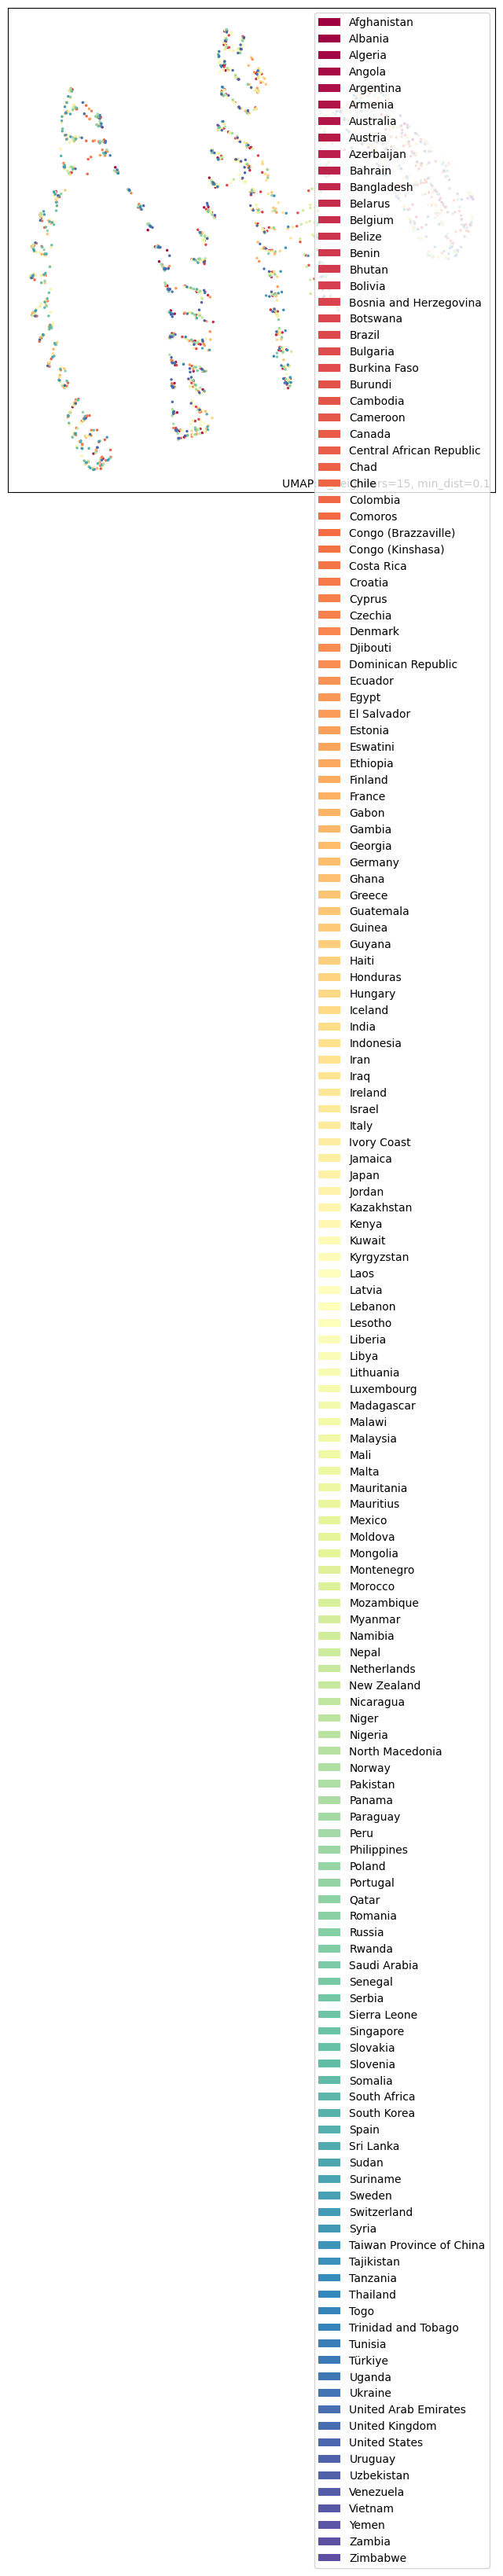

In [58]:
import umap
import umap.plot
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = df.copy(deep=True)
data = data.dropna()
reducer = umap.UMAP()
penguin_data = data[data.columns[2:]].values
print(penguin_data[:5])
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)
umap.plot.points(mapper, labels=data["Country name"])

In [59]:
# TODO: Pairplot

In [48]:
list(df.columns[2:])

['ll',
 'Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect']

In [49]:
df.columns

Index(['Country name', 'year', 'll', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')

In [43]:
df

,Country name,year,ll,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354
2359,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736
2360,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682
2361,Zimbabwe,2022,3.296220,7.670073,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.191350


Here we can see some interesting trends (or so we think we can!).

So let's not get ahead of ourselves. We begin by posing hypoteses, questions that need answering and setting a direction on this stravenous journey. 

## Research questions

What is the average LL over time? Do we notice trends or shifts?

How does LL vary across coutries and continents?

Is there a specific correlation between LL and GDP p c, life expectancy or something else?

Does LL correlate with time-dependent occurings such as war outbreak, economic collapse or natural disasters?

In [37]:
orig_df["ll"].describe()

count    2363.000000
mean        5.483562
std         1.125523
min         1.281271
25%         4.646750
50%         5.448725
75%         6.323592
max         8.018934
Name: ll, dtype: float64

Here we see the std is 1.1, but the difference between the lowest ever ll and highest ever is a whopping 7 points!

Also, µ = 5.48 isn't that high. Right in the middle of the ladder.

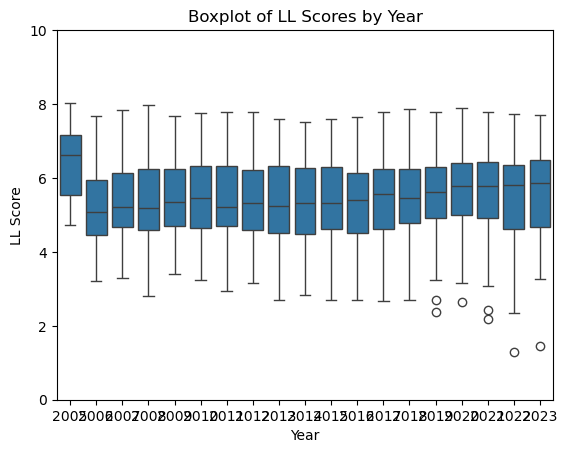

In [19]:
sns.boxplot(x="year", y="ll", data=orig_df)
plt.title('Boxplot of LL Scores by Year')
plt.xlabel('Year')
plt.ylabel('LL Score')
plt.ylim(0, 10)
plt.show()

* First off, there is something happening in the beginning here.
* There _might_ be a significant positive trend.
* No outliers except in the most 5 recent years.

These are all interesting findings. We'll figure some of them out further down. First I just want to look some more at the extremes of our LL column.

In [9]:
df.nlargest(10, columns="ll")

,Country name,year,ll,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
539,Denmark,2005,8.018934,10.849012,0.972372,68.300003,0.971135,NaN,0.236522,0.776689,0.153672
541,Denmark,2008,7.970892,10.877718,0.953912,68.959999,0.969788,0.266182,0.247505,0.759462,0.163091
677,Finland,2020,7.889350,10.765770,0.961621,71.074997,0.962424,-0.122666,0.163636,0.747939,0.192898
675,Finland,2018,7.858107,10.779966,0.962155,70.925003,0.937807,-0.133213,0.198605,0.748826,0.181781
540,Denmark,2007,7.834233,10.888726,0.954201,68.739998,0.932086,0.234116,0.206006,0.777936,0.194324
678,Finland,2021,7.794378,10.793707,0.970289,71.150002,0.963190,-0.039151,0.191754,0.751612,0.175449
674,Finland,2017,7.788252,10.769960,0.963826,70.849998,0.962199,-0.008310,0.192413,0.755858,0.176066
544,Denmark,2011,7.788232,10.845314,0.961736,69.620003,0.934760,0.291636,0.220043,0.777892,0.174883
676,Finland,2019,7.780348,10.791038,0.937416,71.000000,0.947617,-0.057518,0.195338,0.732282,0.180733
2007,Switzerland,2012,7.776209,11.094126,0.946864,71.519997,0.945428,0.131408,0.323241,0.792705,0.176007


In [10]:
df.nsmallest(10, columns="ll")

,Country name,year,ll,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
13,Afghanistan,2022,1.281271,NaN,0.228217,54.875000,0.368377,NaN,0.733198,0.205868,0.575512
14,Afghanistan,2023,1.445909,NaN,0.368478,55.200001,0.228301,NaN,0.738471,0.260513,0.460167
1192,Lebanon,2021,2.178809,9.471698,0.506775,66.150002,0.422697,-0.163791,0.905279,0.263487,0.569101
1193,Lebanon,2022,2.352428,9.458017,0.534528,66.224998,0.449575,-0.130110,0.882996,0.297508,0.429903
11,Afghanistan,2019,2.375092,7.640086,0.419973,53.900002,0.393656,-0.109458,0.923849,0.324108,0.502474
12,Afghanistan,2021,2.436034,7.324501,0.454175,54.549999,0.394306,-0.084656,0.946299,0.178886,0.606713
1834,Sierra Leone,2022,2.560430,7.399671,0.502168,55.299999,0.659596,0.097071,0.861837,0.493701,0.504607
1191,Lebanon,2020,2.633753,9.531791,0.546600,66.074997,0.551601,-0.138668,0.883977,0.352249,0.481800
9,Afghanistan,2017,2.661718,7.647830,0.490880,53.250000,0.427011,-0.122848,0.954393,0.435270,0.371326
2023,Syria,2013,2.687553,8.418935,0.585450,59.820000,0.454883,0.218532,0.663431,0.353619,0.622230


In [52]:
averaged_LL = df.groupby('year')['ll'].mean().reset_index()

(0.0, 10.0)

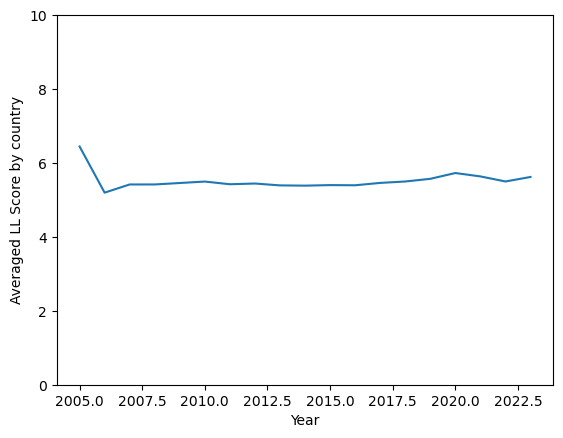

In [53]:
plt.plot(averaged_LL['year'], averaged_LL['ll'])
plt.xlabel('Year')
plt.ylabel('Averaged LL Score by country')
plt.ylim(0, 10)

Text(0.5, 0, 'LL')

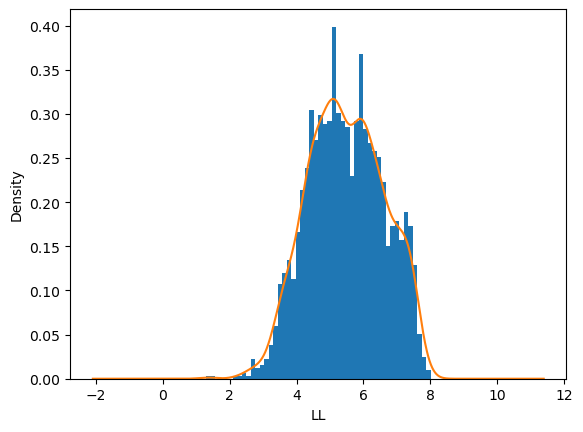

In [69]:
ax = df["ll"].plot.hist(bins=50, density=True)
df['ll'].plot.density(ax=ax)
ax.set_xlabel("LL")

In [12]:
df.mode(axis=1)

/tmp/ipykernel_4111/1210916842.py:1: UserWarning: Unable to sort modes: '<' not supported between instances of 'int' and 'str'
  df.mode(axis=1)


,0,1,2,3,4,5,6,7,8,9,10
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354
2359,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736
2360,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682
2361,Zimbabwe,2022,3.296220,7.670073,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.191350


We see that our PDF has two modes. Let's see if they are detected by the diptest:

In [17]:
import diptest
dip = diptest.dipstat(df["ll"])
dip, pval = diptest.diptest(df["ll"])
print(dip, pval)

0.009209610394614274 0.2074655324702771


Which I _think_ concludes that we are dealing with a multimodal distribution.

Next, we can look at correlations between cols. I'm guessing theres going to be a lot of correlation, especially with things like GDP.

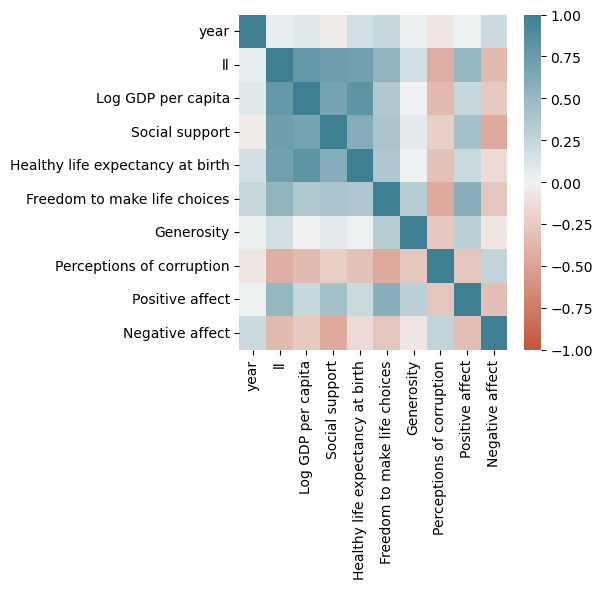

In [20]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.heatmap(df.iloc[:,1:].corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

Now this is interesting!
We see some obvious points here:
* _LL_ does not correlate much with year.
* Cols regarding social status/welfare correlate with eachother, and with LL
* Negative correlation with corruption and negative affect

Lets calculate some sample statistics

In [20]:
column = "Life Ladder"
sample_data = pd.DataFrame({
    "type": column,
    column: orig_df[column].sample(orig_df.shape[0])
})
sample_data_mean_05 = pd.DataFrame({
    "type": "mean_of_5",
    column: [orig_df[column].sample(5).mean() for _ in range(1000)],
})
sample_data_mean_100 = pd.DataFrame({
    "type": "mean_of_100",
    column: [orig_df[column].sample(100).mean() for _ in range(1000)],
})
result = pd.concat([sample_data, sample_data_mean_05, sample_data_mean_100])

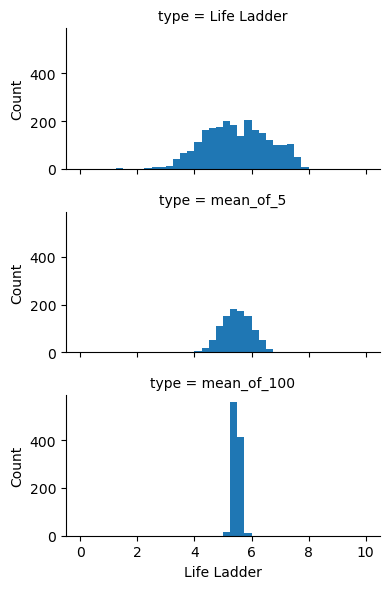

In [21]:
g = sns.FacetGrid(result, col='type', col_wrap=1, 
                  height=2, aspect=2)
g.map(plt.hist, column, range=[0, 10], bins=40)
g.set_axis_labels(column, 'Count')
plt.tight_layout()
plt.show()